In [1]:
%reload_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import numpy as np



from src.utils.data_utils import load_data_first_rating

[nltk_data] Downloading package punkt to /Users/romain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/romain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Impact of initial or recents ratings - RENDU P2

In [2]:
# load the dataset
first_vs_other_rating = load_data_first_rating()
last_vs_other_rating = load_data_first_rating(first=False)

In [3]:
# check the correlation
corr_first = first_vs_other_rating['first_rating'].corr(first_vs_other_rating['other_rating'])
corr_last = last_vs_other_rating['first_rating'].corr(last_vs_other_rating['other_rating'])
print("Correlation between the first and the others rating :", corr_first)
*print("Correlation between the last and the others rating :", corr_last)

Correlation between the first and the others rating : 0.6830005985679996
Correlation between the last and the others rating : 0.6372151201630049


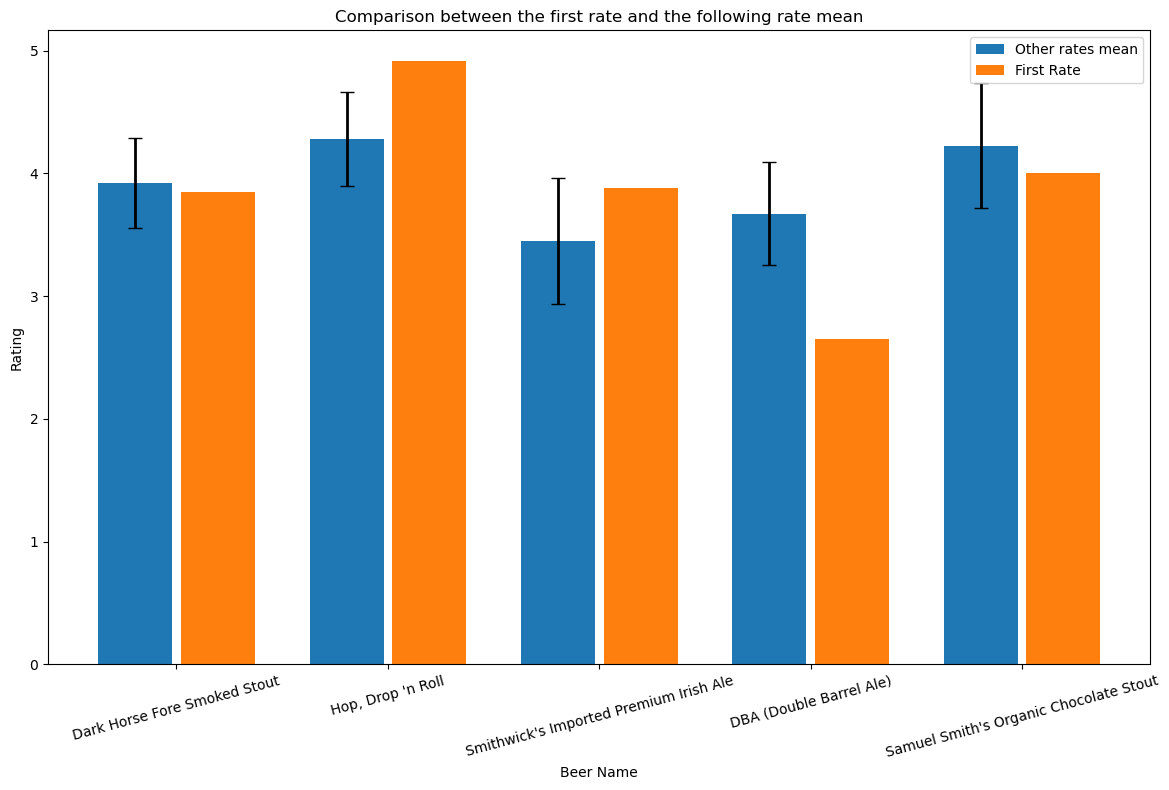

,beer_id,beer_name,other_rating,other_std,first_rating
0,5,Amber,3.453443,0.565258,4.00
1,6,Turbodog,3.661182,0.497240,4.06
2,7,Purple Haze,3.277473,0.651283,3.84
3,10,Allagash Dubbel Ale,3.806008,0.434766,4.06
4,17,Widmer Hefeweizen,3.318346,0.554641,3.88
...,...,...,...,...,...
1399,190513,Project PAM,4.199403,0.342836,4.38
1400,197183,Citradelic Tangerine IPA,3.841030,0.380963,3.11
1401,199848,Stone Pataskala Red X IPA,4.072332,0.318474,2.18
1402,202078,Stone Enjoy By Unfiltered IPA,4.342597,0.312859,4.57


In [4]:
# sample un subset to plot
hist_df = first_vs_other_rating.sample(5)

hist_labels = hist_df['beer_name']
hist_overall_means = hist_df['other_rating']
hist_first_means = hist_df['first_rating']
hist_std = hist_df['other_std']

width = 0.35
gap = 0.02
x = np.arange(len(hist_labels))

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x - width/2-gap, hist_overall_means, width, label='Other rates mean', yerr=hist_std, capsize=5, error_kw={'elinewidth': 2, 'ecolor': 'black'})
ax.bar(x + width/2+gap, hist_first_means, width, label='First Rate')

ax.set_xlabel('Beer Name')
ax.set_ylabel('Rating')
ax.set_title('Comparison between the first rate and the following rate mean')
ax.set_xticks(x)
ax.set_xticklabels(hist_labels, rotation=15, ha='center')
ax.legend()

plt.tight_layout()
plt.show()
first_vs_other_rating

In [5]:
# perform statistical test to see if the variable are correlated

print(pearsonr(first_vs_other_rating['first_rating'], first_vs_other_rating['other_rating']))
print(spearmanr(first_vs_other_rating['first_rating'], first_vs_other_rating['other_rating']))

PearsonRResult(statistic=0.683000598567999, pvalue=1.662478409079184e-193)
SignificanceResult(statistic=0.5941634172208455, pvalue=9.632156923063058e-135)


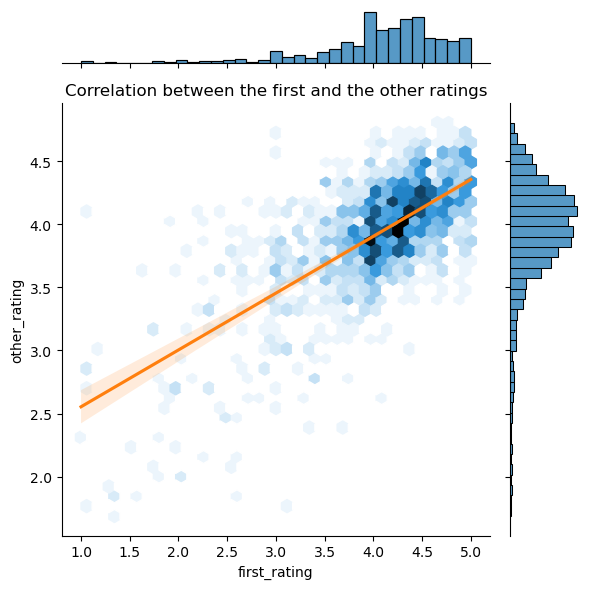

In [6]:
# On this join plot we see the correlation between first_rating and other_rating

sns.jointplot(x='first_rating', y='other_rating', data=first_vs_other_rating, kind='hex')
sns.regplot(x='first_rating', y='other_rating', data=first_vs_other_rating, scatter=False, color='#FF7F0E')
plt.title('Correlation between the first and the other ratings')

plt.tight_layout()
plt.show()

# New code

In [7]:
data_path = 'data/BeerAdvocate/ratings.csv'


# load the rating dataset
ratings_df = pd.read_csv(data_path)

'''# select usefull columns and sort by date
rating_per_date = ratings_df[['beer_id', 'beer_name', 'date', 'rating']].sort_values(by=['beer_id', 'date'], ascending=first)
rating_per_date = rating_per_date.dropna()

# add a columns containing the count of review per beers
rating_per_date['count'] = rating_per_date.groupby('beer_id')['beer_id'].transform('count')

# drop the columns with unsignificative final rate
rating_per_date = rating_per_date[rating_per_date['count'] > min_count]

# split the dataset between first rating and every other
first_rating = rating_per_date.groupby('beer_id').head(1)
others_rating = rating_per_date.drop(first_rating.index)
others_rating = others_rating.groupby(by='beer_id').agg(beer_name=('beer_name', 'min'), other_rating=('rating', 'mean'), other_std=('rating', 'std'))

# merge the two dataset with each rating in distinct columns
first_vs_other_rating = pd.merge(others_rating, first_rating[['beer_id', 'rating']], on='beer_id', how='left')
first_vs_other_rating = first_vs_other_rating.rename(columns={'rating': 'first_rating'})'''
ratings_df

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving: 500ml brown bottlePour: Good head wit...,True
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8393027,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1141038000,jaluria,jaluria.31362,3.50,3.50,3.50,4.00,4.0,3.80,I'll start off reviewing this beer with the fo...,True
8393028,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1140346800,Dithyramb,dithyramb.4413,3.00,3.00,3.00,2.50,3.0,2.80,Served on draft at the pub. Poured a clear yel...,True
8393029,Kölsch Ale,19139,Summit Station Restaurant & Brewery,885,Kölsch,5.0,1092132000,ManekiNeko,manekineko.2654,3.00,1.50,1.00,1.50,1.5,1.54,Served on tap at the brewpub in a pint glass.A...,True
8393030,Nut Brown Ale,19140,Summit Station Restaurant & Brewery,885,English Brown Ale,5.3,1341741600,Redsox1539,redsox1539.683632,NaN,NaN,NaN,NaN,NaN,3.50,NaN,False


# TODO correlation de toutes les premieres notes et de toutes les secondes, puis toutes les secondes et toutes les 3emes, 3 et 4, 4 et 5, 5et 6 etc

In [8]:
def calculate_correlation(series1, series2):
    return np.corrcoef(series1, series2)[0, 1] # matrice de correlation donc on prend 01 ou 10

# Appliquer l'analyse par bière
grouped_data = ratings_df.groupby('beer_id')

rating_per_date = ratings_df[['beer_id', 'beer_name', 'date', 'rating']].sort_values(by=['beer_id', 'date'], ascending=True)
rating_per_date = rating_per_date.dropna()

rating_per_date['count'] = rating_per_date.groupby('beer_id')['beer_id'].transform('count')

min_count = 1000
rating_per_date = rating_per_date[rating_per_date['count'] > min_count]
#rating_per_date

In [9]:
rating_list = rating_per_date.groupby('beer_id').agg(beer_name=('beer_name', 'min'),  rating=('rating', list))
rating_list

,beer_name,rating
beer_id,,
5,Amber,"[4.0, 3.38, 3.98, 3.65, 3.3, 2.81, 3.53, 2.83,..."
6,Turbodog,"[4.06, 3.06, 4.1, 2.76, 4.03, 3.36, 4.0, 3.88,..."
7,Purple Haze,"[3.84, 3.57, 3.06, 3.92, 3.5, 3.0, 2.95, 3.33,..."
10,Allagash Dubbel Ale,"[4.06, 3.97, 4.32, 2.71, 3.26, 4.1, 4.58, 3.95..."
17,Widmer Hefeweizen,"[3.88, 4.01, 4.1, 3.03, 4.5, 3.98, 4.0, 4.3, 3..."
...,...,...
190513,Project PAM,"[4.38, 4.31, 3.82, 4.06, 4.0, 4.5, 4.15, 3.73,..."
197183,Citradelic Tangerine IPA,"[3.11, 5.0, 4.39, 3.96, 3.76, 4.05, 3.32, 4.41..."
199848,Stone Pataskala Red X IPA,"[2.18, 4.38, 4.25, 4.18, 3.63, 3.68, 4.25, 4.1..."


In [10]:
rating_list['shift_rating'] = rating_list['rating'].apply(lambda x: x[1:])
rating_list['random_rating'] = rating_list['rating'].apply(lambda x : np.random.permutation(np.array(x)))
rating_list

,beer_name,rating,shift_rating,random_rating
beer_id,,,,
5,Amber,"[4.0, 3.38, 3.98, 3.65, 3.3, 2.81, 3.53, 2.83,...","[3.38, 3.98, 3.65, 3.3, 2.81, 3.53, 2.83, 3.6,...","[3.82, 3.0, 3.65, 2.75, 3.5, 3.75, 3.5, 3.36, ..."
6,Turbodog,"[4.06, 3.06, 4.1, 2.76, 4.03, 3.36, 4.0, 3.88,...","[3.06, 4.1, 2.76, 4.03, 3.36, 4.0, 3.88, 2.88,...","[3.48, 3.71, 3.38, 3.49, 4.0, 3.5, 3.95, 3.41,..."
7,Purple Haze,"[3.84, 3.57, 3.06, 3.92, 3.5, 3.0, 2.95, 3.33,...","[3.57, 3.06, 3.92, 3.5, 3.0, 2.95, 3.33, 3.13,...","[4.0, 3.78, 3.69, 1.0, 3.35, 3.0, 2.6, 1.75, 3..."
10,Allagash Dubbel Ale,"[4.06, 3.97, 4.32, 2.71, 3.26, 4.1, 4.58, 3.95...","[3.97, 4.32, 2.71, 3.26, 4.1, 4.58, 3.95, 4.32...","[3.75, 3.88, 3.72, 3.93, 4.0, 4.27, 3.52, 3.75..."
17,Widmer Hefeweizen,"[3.88, 4.01, 4.1, 3.03, 4.5, 3.98, 4.0, 4.3, 3...","[4.01, 4.1, 3.03, 4.5, 3.98, 4.0, 4.3, 3.71, 4...","[3.3, 2.75, 3.48, 3.75, 3.25, 3.5, 3.99, 2.0, ..."
...,...,...,...,...
190513,Project PAM,"[4.38, 4.31, 3.82, 4.06, 4.0, 4.5, 4.15, 3.73,...","[4.31, 3.82, 4.06, 4.0, 4.5, 4.15, 3.73, 3.83,...","[4.35, 4.12, 4.94, 4.17, 3.71, 4.86, 4.21, 4.1..."
197183,Citradelic Tangerine IPA,"[3.11, 5.0, 4.39, 3.96, 3.76, 4.05, 3.32, 4.41...","[5.0, 4.39, 3.96, 3.76, 4.05, 3.32, 4.41, 4.25...","[4.65, 4.29, 3.96, 4.1, 4.31, 3.94, 3.79, 4.31..."
199848,Stone Pataskala Red X IPA,"[2.18, 4.38, 4.25, 4.18, 3.63, 3.68, 4.25, 4.1...","[4.38, 4.25, 4.18, 3.63, 3.68, 4.25, 4.14, 4.0...","[4.03, 4.24, 4.12, 3.94, 3.88, 4.25, 4.75, 4.3..."


In [11]:
def calculate_pairwise_correlation_adjusted(list1, list2):
    """
    Ajuste les tailles des listes si elles sont différentes, puis calcule la corrélation.
    Si l'une des listes est trop courte ou contient des NaN, retourne NaN.
    """
    min_length = min(len(list1), len(list2))
    list1, list2 = list1[:min_length], list2[:min_length]  # Troncature pour aligner les tailles
    if len(list1) < 2 or len(list2) < 2:  # Besoin d'au moins 2 éléments pour une corrélation
        return np.nan
    return np.corrcoef(list1, list2)[0, 1]


rating_list['correlation_rating_shift'] = rating_list.apply(
    lambda row: calculate_pairwise_correlation_adjusted(row['rating'], row['shift_rating']), axis=1
)

# Calculer la moyenne des corrélations (en ignorant les NaN)
mean_correlation = rating_list['correlation_rating_shift'].mean()

# Résultat
print("Corrélation moyenne entre 'rating' et 'shift_rating' (après ajustement) :", mean_correlation)
rating_list

Corrélation moyenne entre 'rating' et 'shift_rating' (après ajustement) : 0.04081650482281812


,beer_name,rating,shift_rating,random_rating,correlation_rating_shift
beer_id,,,,,
5,Amber,"[4.0, 3.38, 3.98, 3.65, 3.3, 2.81, 3.53, 2.83,...","[3.38, 3.98, 3.65, 3.3, 2.81, 3.53, 2.83, 3.6,...","[3.82, 3.0, 3.65, 2.75, 3.5, 3.75, 3.5, 3.36, ...",0.017520
6,Turbodog,"[4.06, 3.06, 4.1, 2.76, 4.03, 3.36, 4.0, 3.88,...","[3.06, 4.1, 2.76, 4.03, 3.36, 4.0, 3.88, 2.88,...","[3.48, 3.71, 3.38, 3.49, 4.0, 3.5, 3.95, 3.41,...",0.013978
7,Purple Haze,"[3.84, 3.57, 3.06, 3.92, 3.5, 3.0, 2.95, 3.33,...","[3.57, 3.06, 3.92, 3.5, 3.0, 2.95, 3.33, 3.13,...","[4.0, 3.78, 3.69, 1.0, 3.35, 3.0, 2.6, 1.75, 3...",0.003994
10,Allagash Dubbel Ale,"[4.06, 3.97, 4.32, 2.71, 3.26, 4.1, 4.58, 3.95...","[3.97, 4.32, 2.71, 3.26, 4.1, 4.58, 3.95, 4.32...","[3.75, 3.88, 3.72, 3.93, 4.0, 4.27, 3.52, 3.75...",0.012110
17,Widmer Hefeweizen,"[3.88, 4.01, 4.1, 3.03, 4.5, 3.98, 4.0, 4.3, 3...","[4.01, 4.1, 3.03, 4.5, 3.98, 4.0, 4.3, 3.71, 4...","[3.3, 2.75, 3.48, 3.75, 3.25, 3.5, 3.99, 2.0, ...",0.032606
...,...,...,...,...,...
190513,Project PAM,"[4.38, 4.31, 3.82, 4.06, 4.0, 4.5, 4.15, 3.73,...","[4.31, 3.82, 4.06, 4.0, 4.5, 4.15, 3.73, 3.83,...","[4.35, 4.12, 4.94, 4.17, 3.71, 4.86, 4.21, 4.1...",-0.012563
197183,Citradelic Tangerine IPA,"[3.11, 5.0, 4.39, 3.96, 3.76, 4.05, 3.32, 4.41...","[5.0, 4.39, 3.96, 3.76, 4.05, 3.32, 4.41, 4.25...","[4.65, 4.29, 3.96, 4.1, 4.31, 3.94, 3.79, 4.31...",0.008437
199848,Stone Pataskala Red X IPA,"[2.18, 4.38, 4.25, 4.18, 3.63, 3.68, 4.25, 4.1...","[4.38, 4.25, 4.18, 3.63, 3.68, 4.25, 4.14, 4.0...","[4.03, 4.24, 4.12, 3.94, 3.88, 4.25, 4.75, 4.3...",-0.023288


In [12]:
rating_list['correlation_rating_random'] = rating_list.apply(
    lambda row: calculate_pairwise_correlation_adjusted(row['rating'], row['random_rating']), axis=1
)

mean_correlation = rating_list['correlation_rating_random'].mean()

# Résultat
print("Corrélation moyenne entre 'rating' et 'shift_rating' (après ajustement) :", mean_correlation)
rating_list

Corrélation moyenne entre 'rating' et 'shift_rating' (après ajustement) : -0.000811382789232316


,beer_name,rating,shift_rating,random_rating,correlation_rating_shift,correlation_rating_random
beer_id,,,,,,
5,Amber,"[4.0, 3.38, 3.98, 3.65, 3.3, 2.81, 3.53, 2.83,...","[3.38, 3.98, 3.65, 3.3, 2.81, 3.53, 2.83, 3.6,...","[3.82, 3.0, 3.65, 2.75, 3.5, 3.75, 3.5, 3.36, ...",0.017520,-0.017170
6,Turbodog,"[4.06, 3.06, 4.1, 2.76, 4.03, 3.36, 4.0, 3.88,...","[3.06, 4.1, 2.76, 4.03, 3.36, 4.0, 3.88, 2.88,...","[3.48, 3.71, 3.38, 3.49, 4.0, 3.5, 3.95, 3.41,...",0.013978,-0.012653
7,Purple Haze,"[3.84, 3.57, 3.06, 3.92, 3.5, 3.0, 2.95, 3.33,...","[3.57, 3.06, 3.92, 3.5, 3.0, 2.95, 3.33, 3.13,...","[4.0, 3.78, 3.69, 1.0, 3.35, 3.0, 2.6, 1.75, 3...",0.003994,0.033866
10,Allagash Dubbel Ale,"[4.06, 3.97, 4.32, 2.71, 3.26, 4.1, 4.58, 3.95...","[3.97, 4.32, 2.71, 3.26, 4.1, 4.58, 3.95, 4.32...","[3.75, 3.88, 3.72, 3.93, 4.0, 4.27, 3.52, 3.75...",0.012110,-0.013262
17,Widmer Hefeweizen,"[3.88, 4.01, 4.1, 3.03, 4.5, 3.98, 4.0, 4.3, 3...","[4.01, 4.1, 3.03, 4.5, 3.98, 4.0, 4.3, 3.71, 4...","[3.3, 2.75, 3.48, 3.75, 3.25, 3.5, 3.99, 2.0, ...",0.032606,-0.005401
...,...,...,...,...,...,...
190513,Project PAM,"[4.38, 4.31, 3.82, 4.06, 4.0, 4.5, 4.15, 3.73,...","[4.31, 3.82, 4.06, 4.0, 4.5, 4.15, 3.73, 3.83,...","[4.35, 4.12, 4.94, 4.17, 3.71, 4.86, 4.21, 4.1...",-0.012563,0.006723
197183,Citradelic Tangerine IPA,"[3.11, 5.0, 4.39, 3.96, 3.76, 4.05, 3.32, 4.41...","[5.0, 4.39, 3.96, 3.76, 4.05, 3.32, 4.41, 4.25...","[4.65, 4.29, 3.96, 4.1, 4.31, 3.94, 3.79, 4.31...",0.008437,-0.007760
199848,Stone Pataskala Red X IPA,"[2.18, 4.38, 4.25, 4.18, 3.63, 3.68, 4.25, 4.1...","[4.38, 4.25, 4.18, 3.63, 3.68, 4.25, 4.14, 4.0...","[4.03, 4.24, 4.12, 3.94, 3.88, 4.25, 4.75, 4.3...",-0.023288,-0.040371


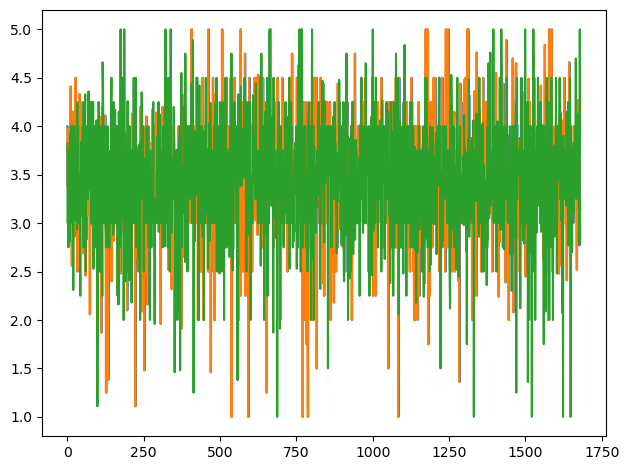

In [13]:
plt.plot(rating_list['rating'].iloc[0])
plt.plot(rating_list['shift_rating'].iloc[0])
plt.plot(rating_list['random_rating'].iloc[0])

plt.tight_layout()
plt.show()

FOR IDX 100


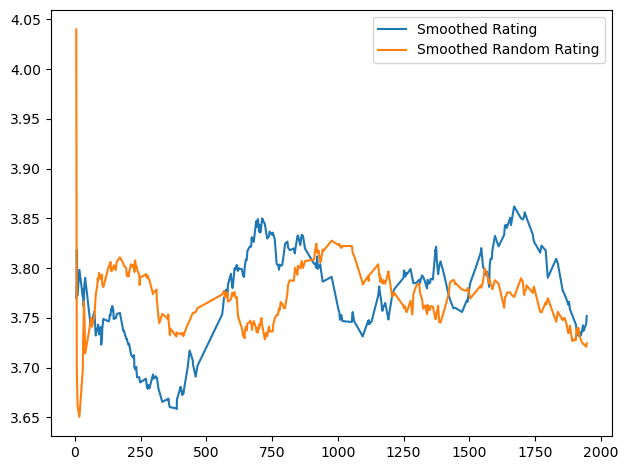

FOR IDX 101


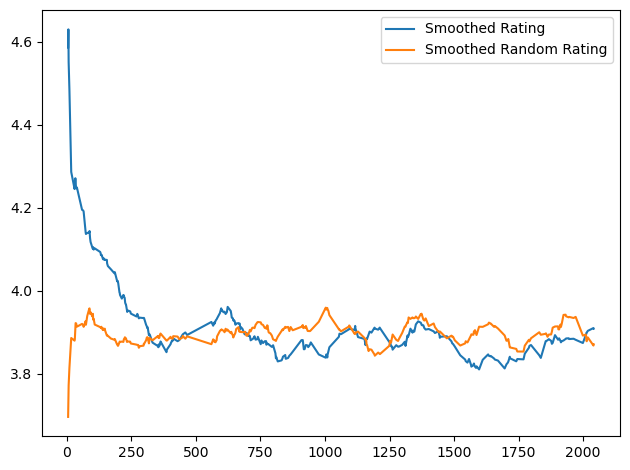

FOR IDX 102


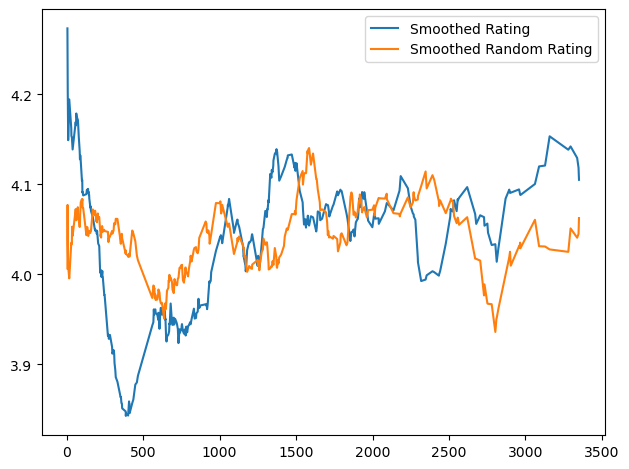

FOR IDX 103


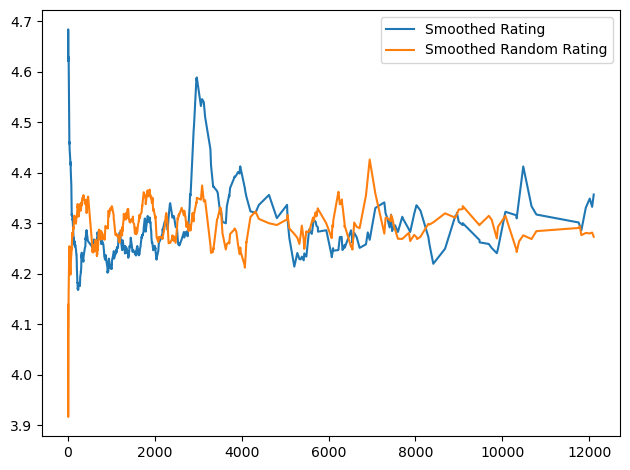

FOR IDX 104


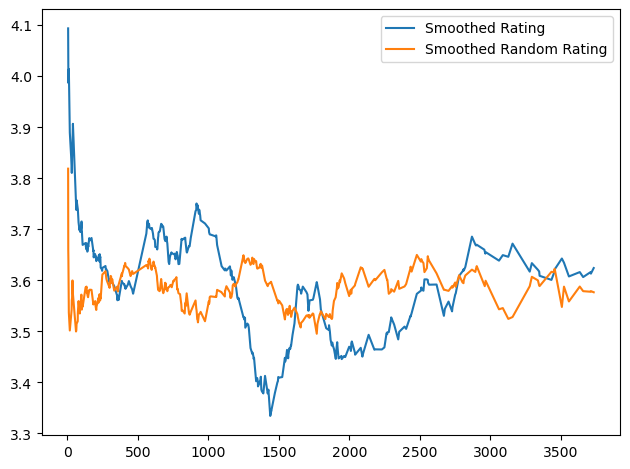

FOR IDX 105


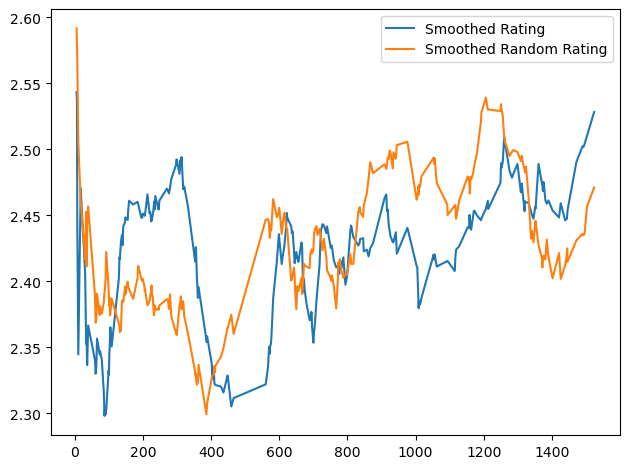

FOR IDX 106


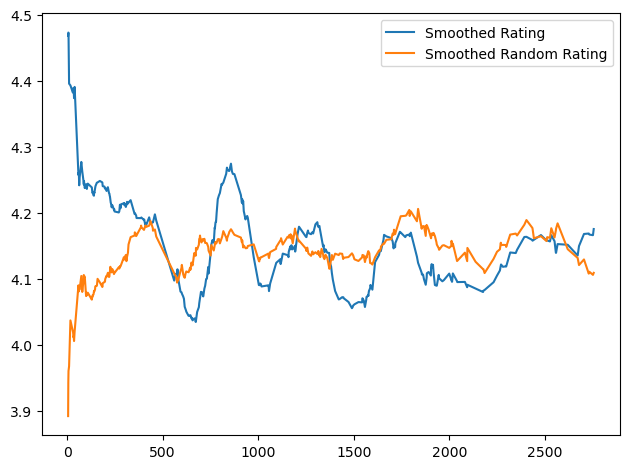

FOR IDX 107


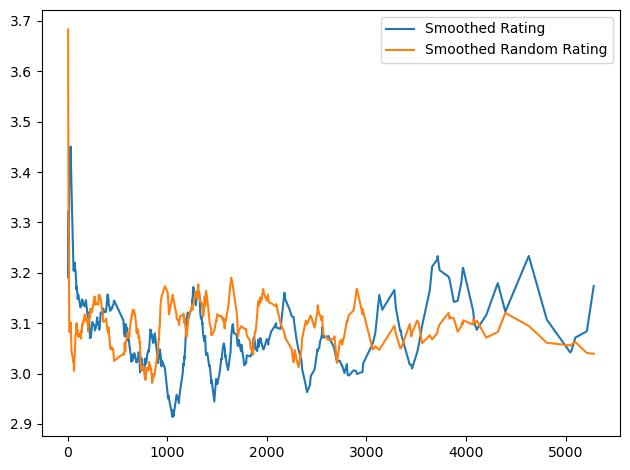

FOR IDX 108


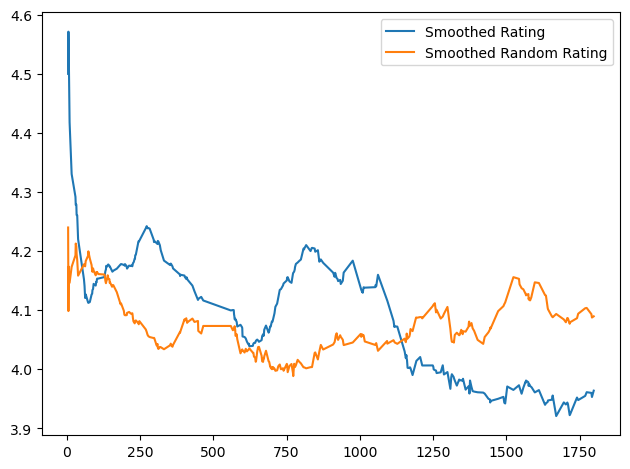

FOR IDX 109


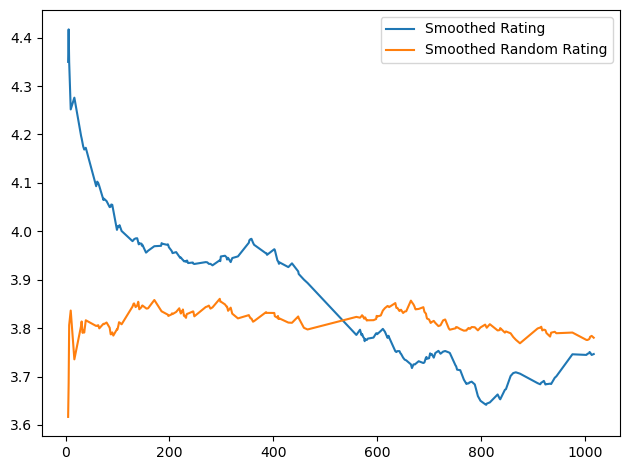

FOR IDX 110


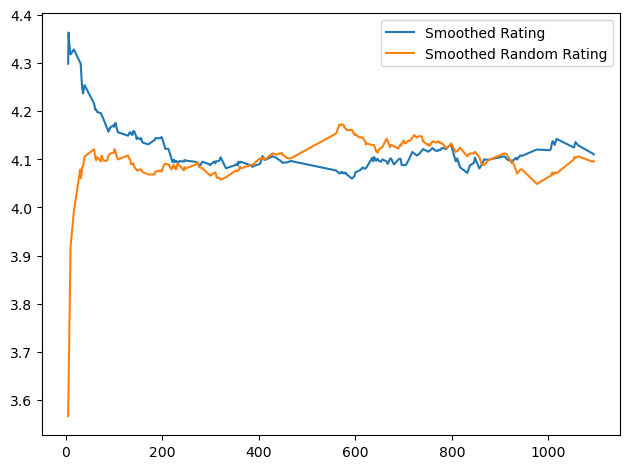

FOR IDX 111


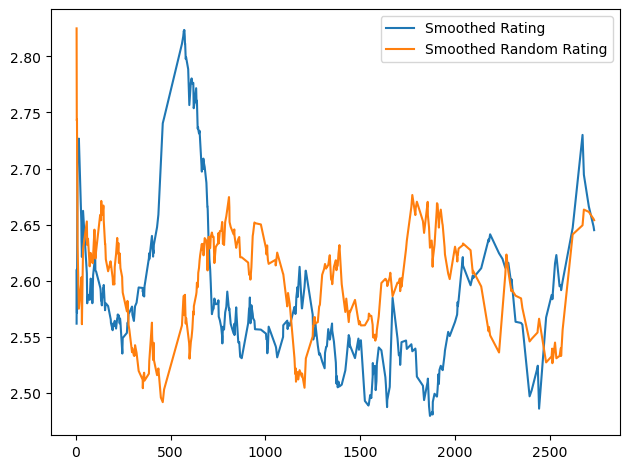

FOR IDX 112


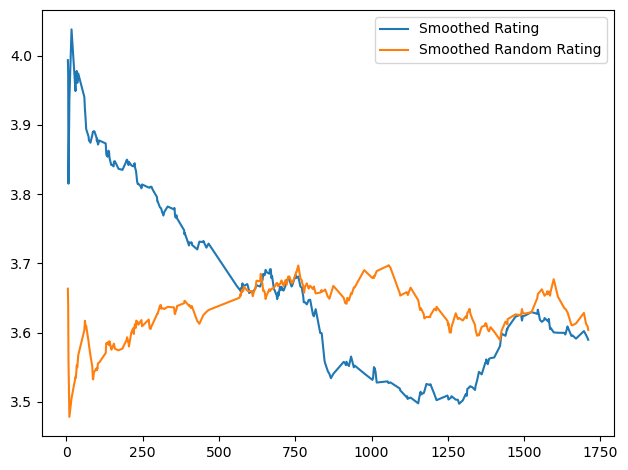

FOR IDX 113


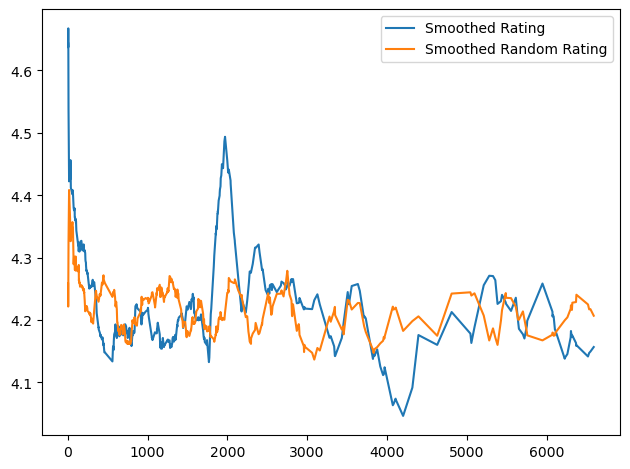

FOR IDX 114


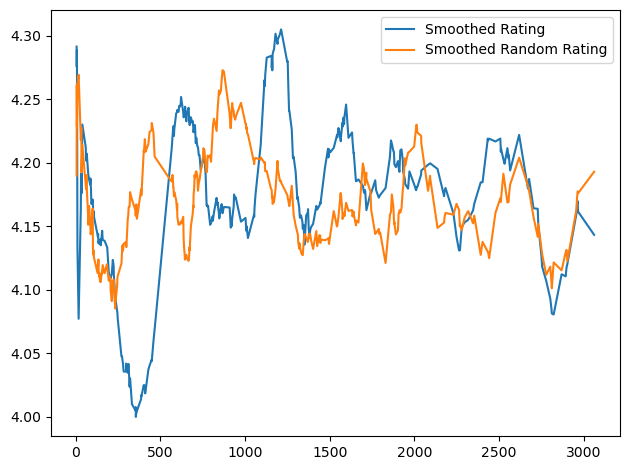

FOR IDX 115


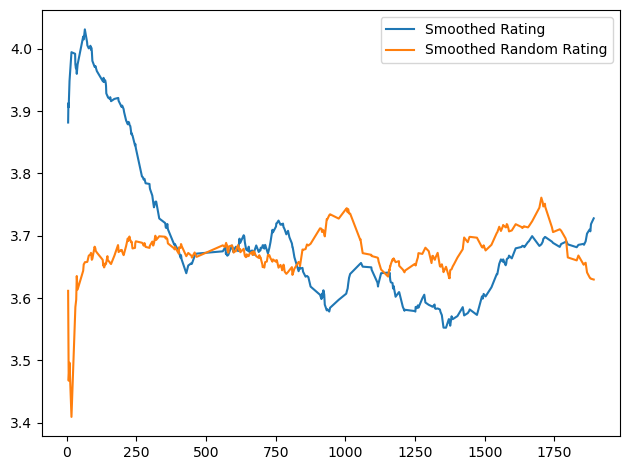

FOR IDX 116


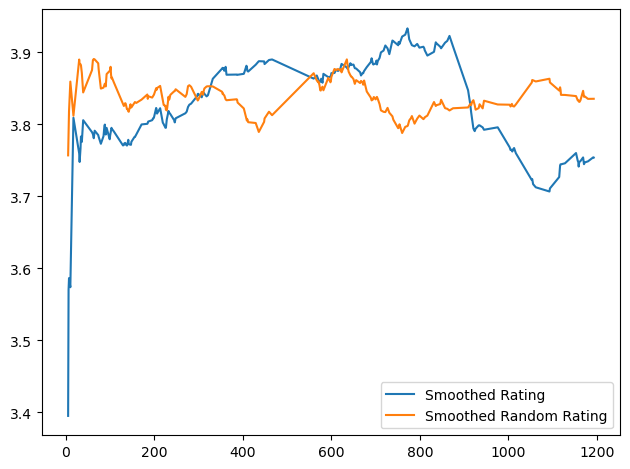

FOR IDX 117


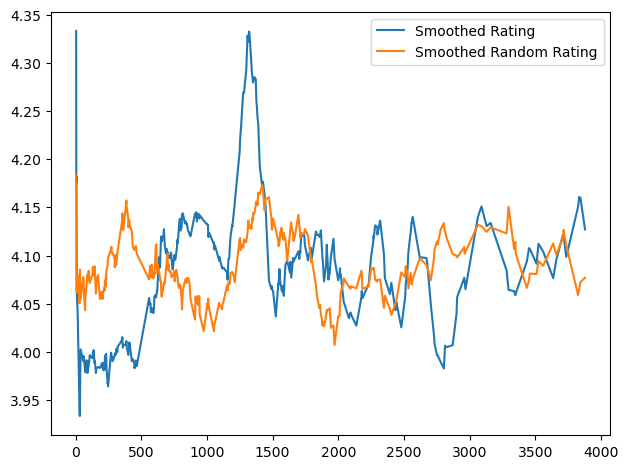

FOR IDX 118


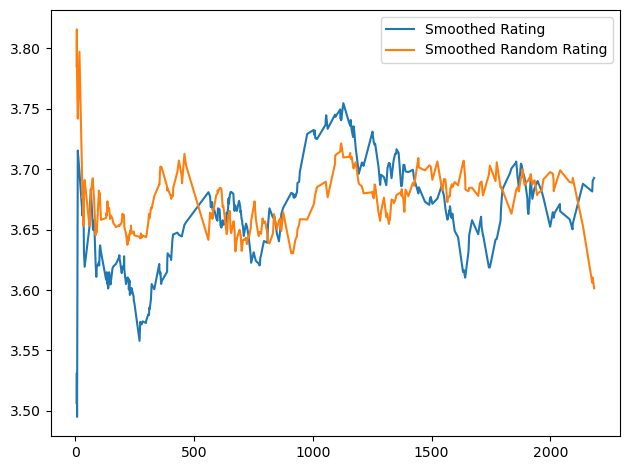

FOR IDX 119


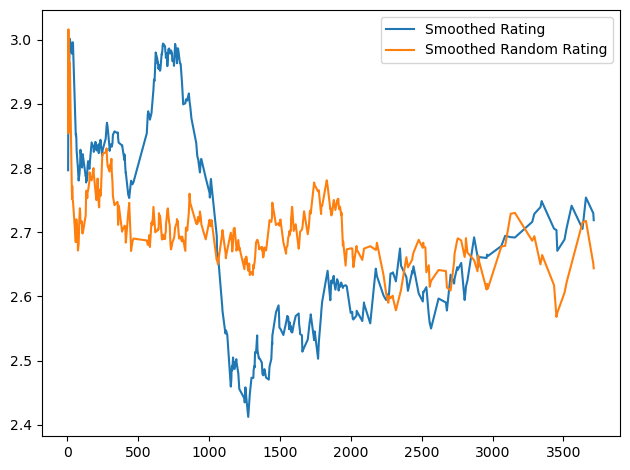

FOR IDX 120


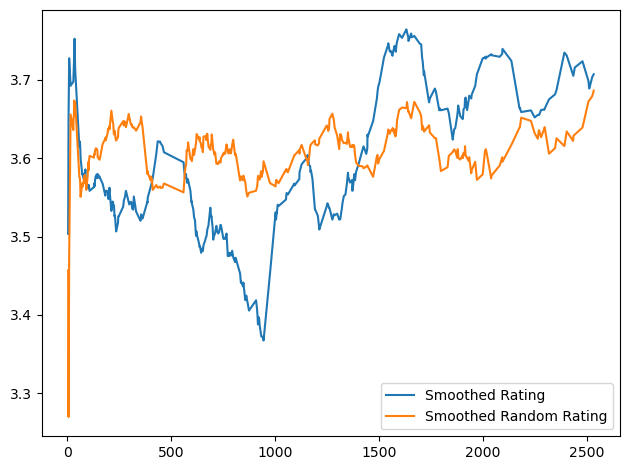

FOR IDX 121


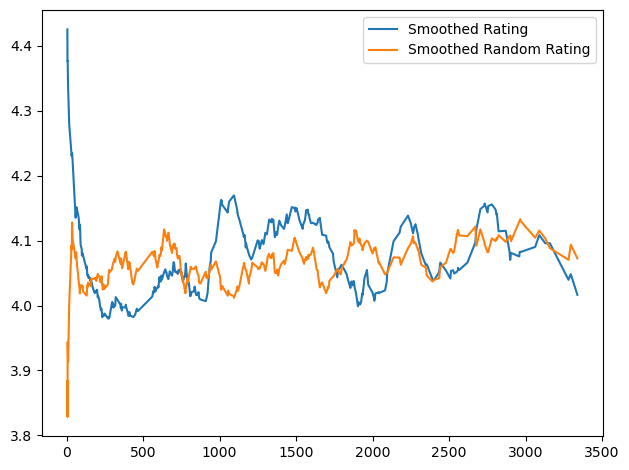

FOR IDX 122


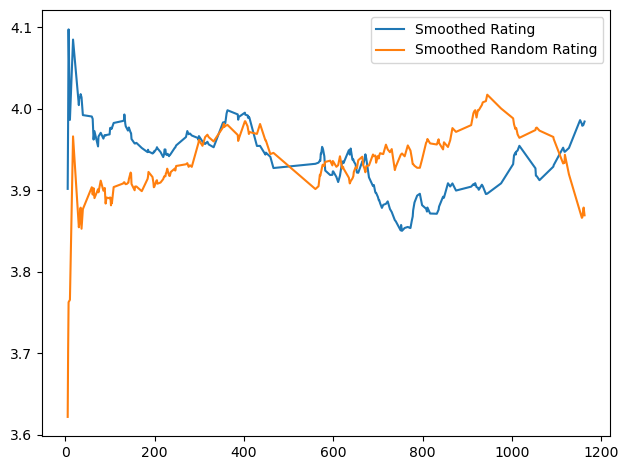

FOR IDX 123


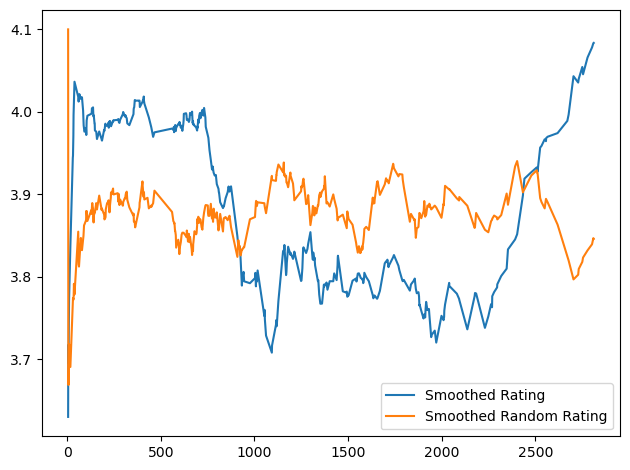

FOR IDX 124


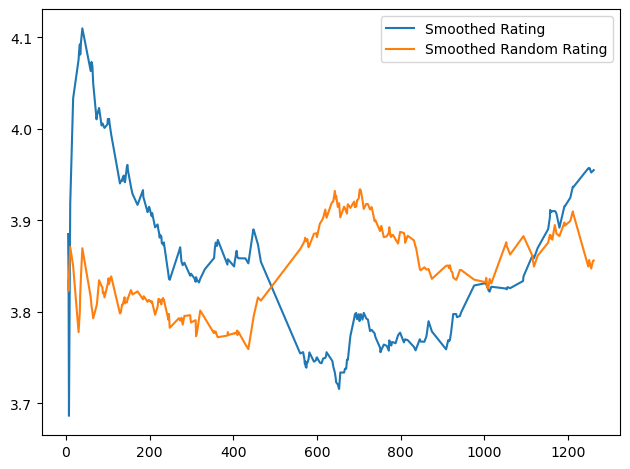

FOR IDX 125


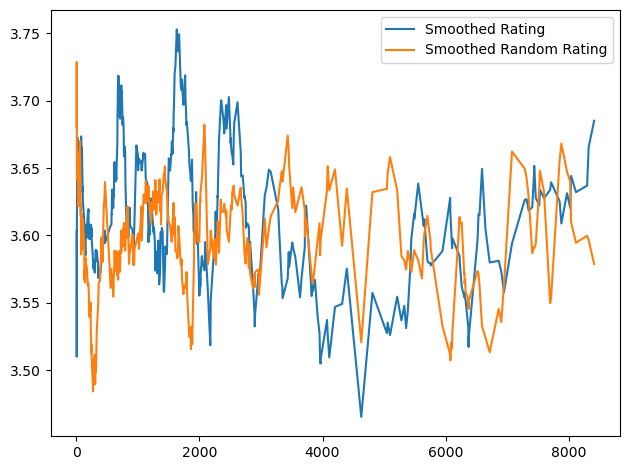

FOR IDX 126


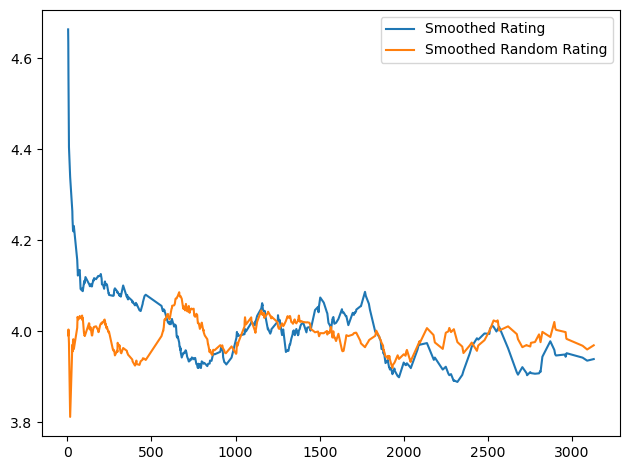

FOR IDX 127


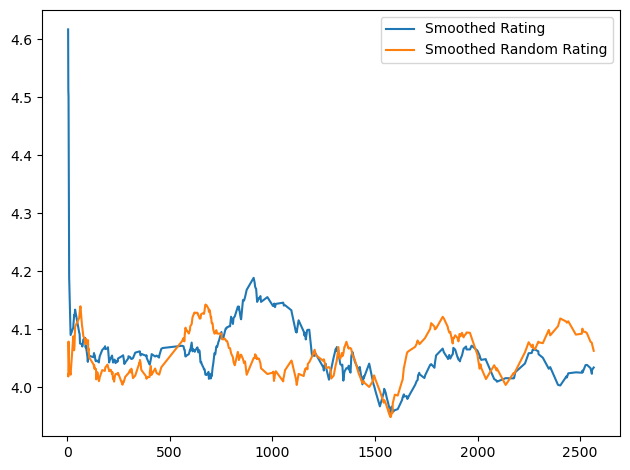

FOR IDX 128


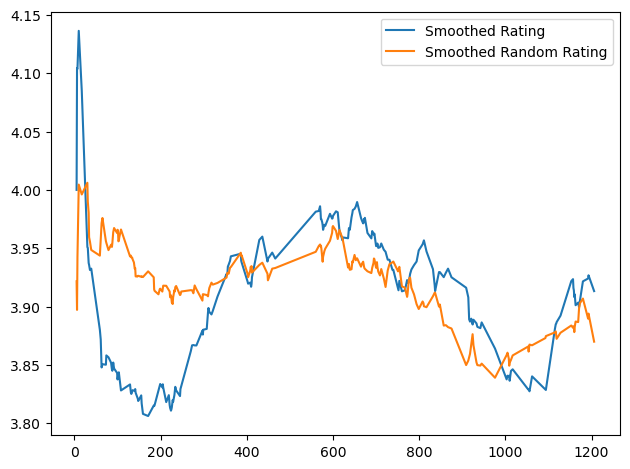

FOR IDX 129


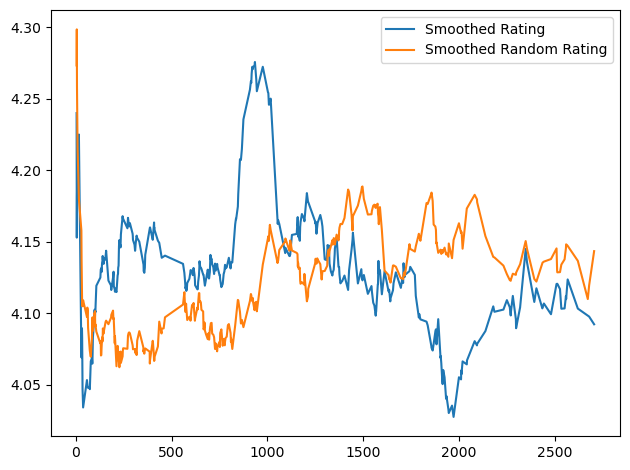

FOR IDX 130


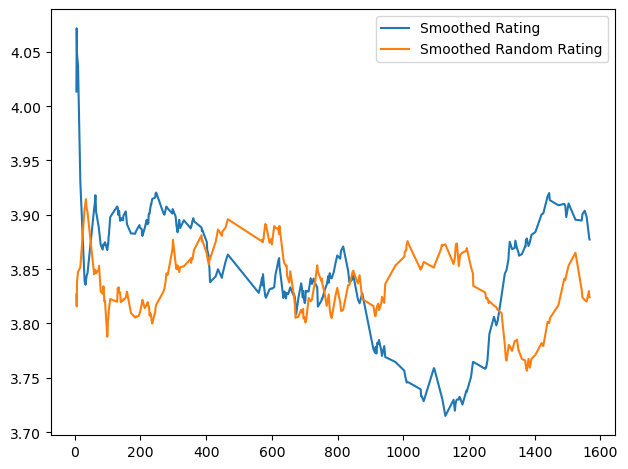

FOR IDX 131


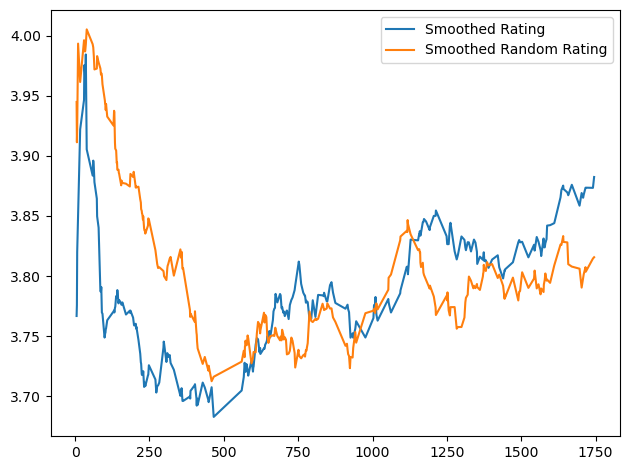

FOR IDX 132


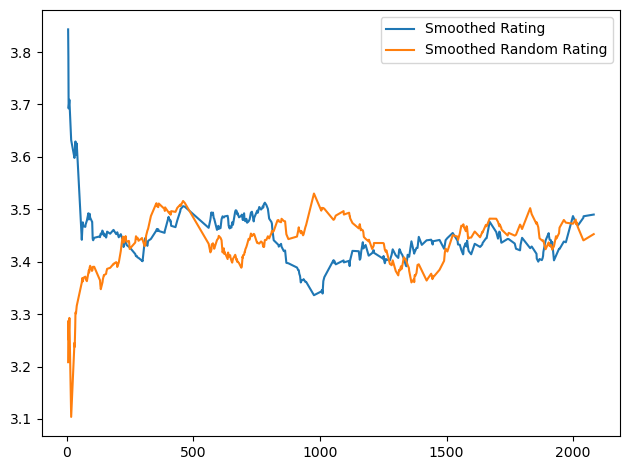

FOR IDX 133


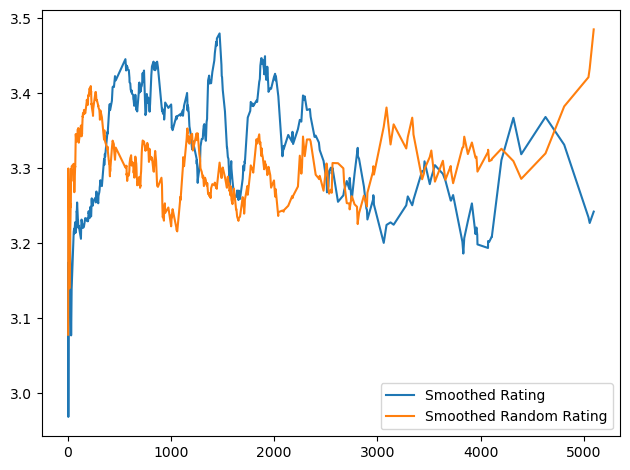

FOR IDX 134


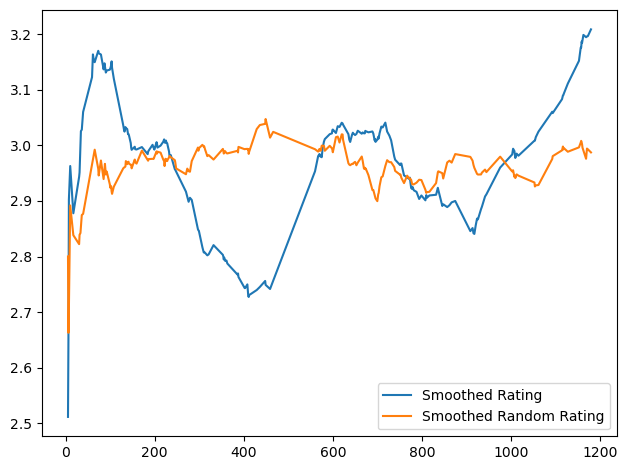

FOR IDX 135


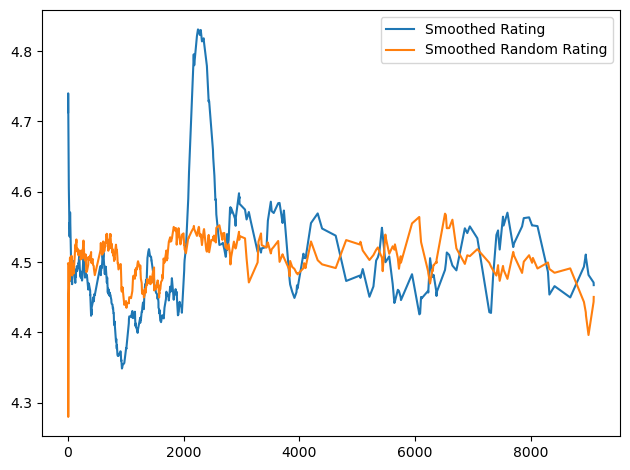

FOR IDX 136


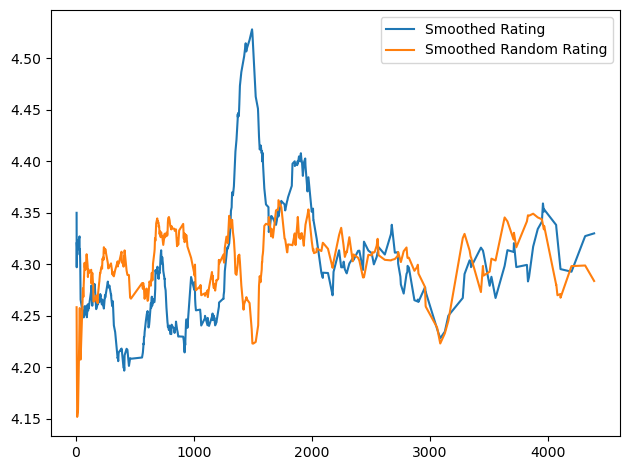

FOR IDX 137


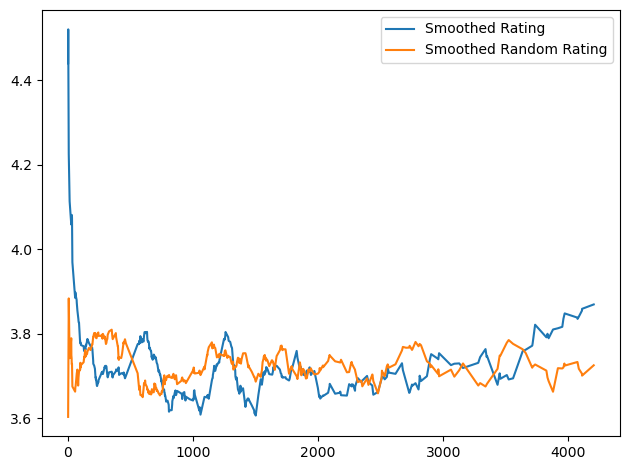

FOR IDX 138


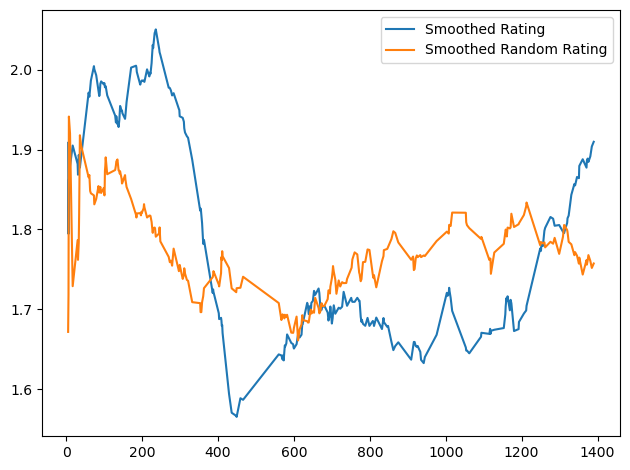

FOR IDX 139


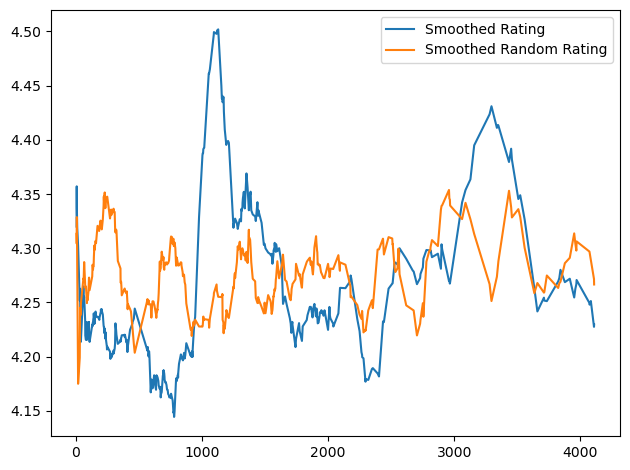

FOR IDX 140


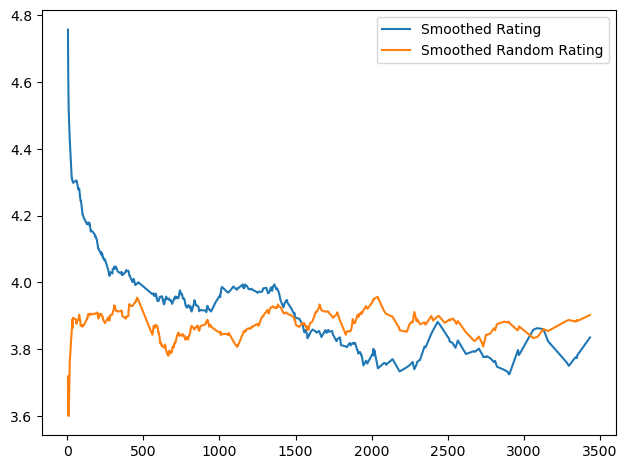

FOR IDX 141


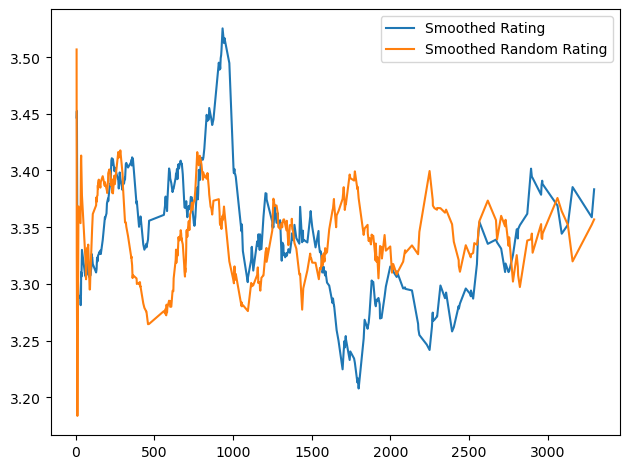

FOR IDX 142


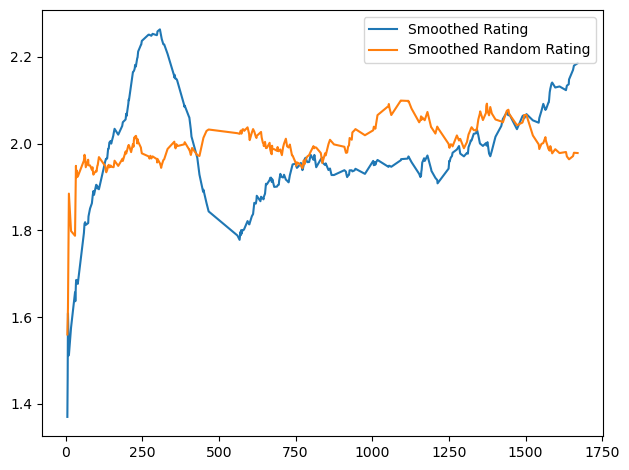

FOR IDX 143


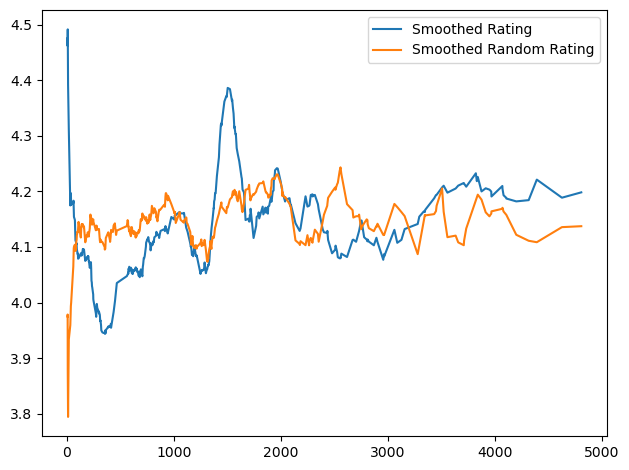

FOR IDX 144


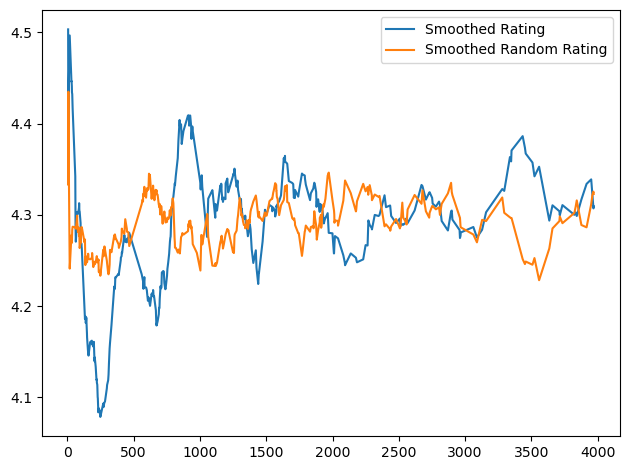

FOR IDX 145


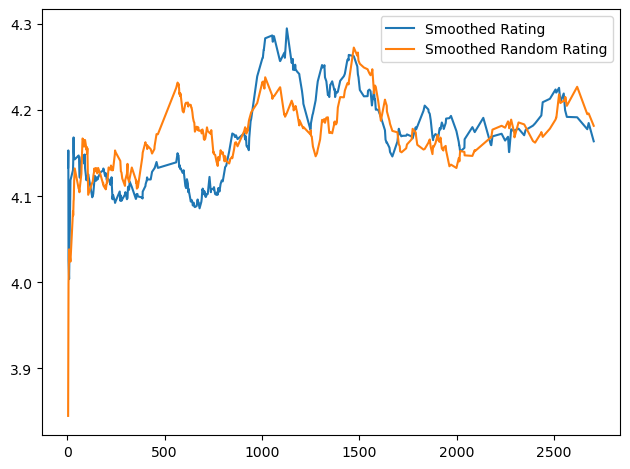

FOR IDX 146


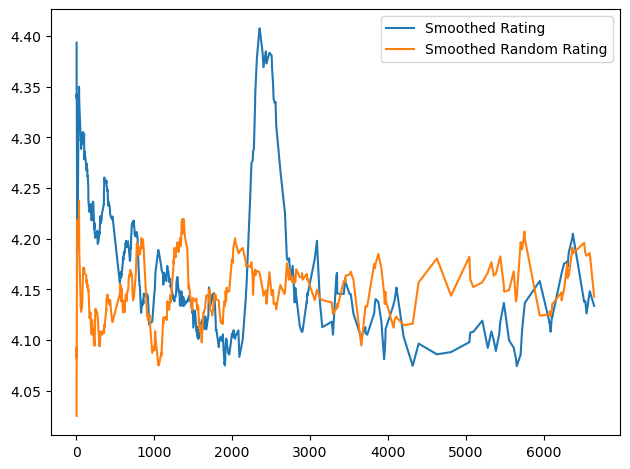

FOR IDX 147


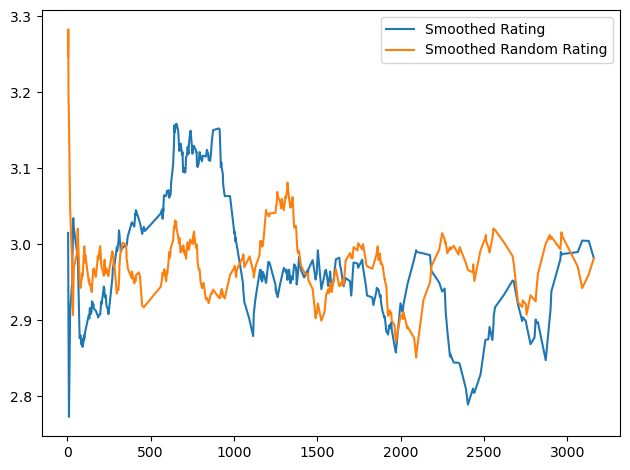

FOR IDX 148


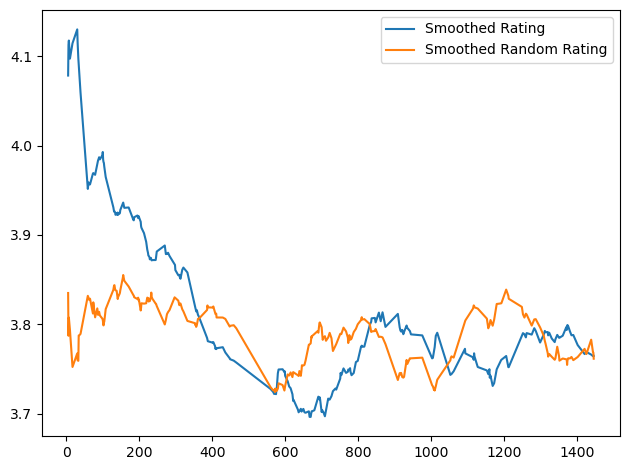

FOR IDX 149


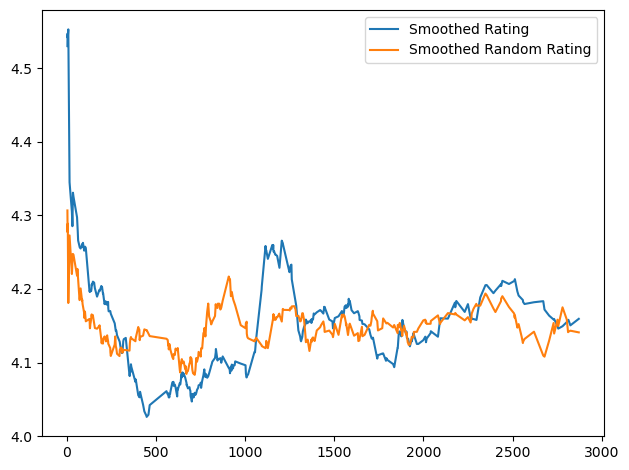

In [14]:
def moving_average(data, window_size=5):

    data_series = pd.Series(data)
    return data_series.rolling(window=window_size, min_periods=1).mean()

window_size = 200
for idx in range(100, 150):
    rating_list['smoothed_rating'] = moving_average(rating_list['rating'].iloc[idx], window_size=window_size)
    rating_list['smoothed_shift_rating'] = moving_average(rating_list['shift_rating'].iloc[idx], window_size=window_size)
    rating_list['smoothed_random_rating'] = moving_average(rating_list['random_rating'].iloc[idx], window_size=window_size)
    
    plt.plot(rating_list['smoothed_rating'], label='Smoothed Rating')
    #plt.plot(rating_list['smoothed_shift_rating'], label='Smoothed Shifted Rating')
    plt.plot(rating_list['smoothed_random_rating'], label='Smoothed Random Rating')
    print(f'FOR IDX {idx}')
    plt.legend()
    plt.tight_layout()
    plt.show()


# take n first notes and compare them with the final rating AND taken n random rating vs the final one

In [15]:
def load_data_first_n_rating(data_path='data/BeerAdvocate/ratings.csv', min_count=1000, first=True, n=10):
    """
    Return the dataframe used for first vs other rating influence

    Parameters
    ----------
    data_path: The path to the analysis files
    min_count: The minimum of review a beer need so that its rating is considered valid
    first: If True, compare the first rating, if false take the last one (only to show differences)

    Returns
    -------
    The dataframe used for the analysis
    """
    
    # load the rating dataset
    ratings_df = pd.read_csv(data_path)

    # select usefull columns and sort by date
    rating_per_date = ratings_df[['beer_id', 'beer_name', 'date', 'rating']].sort_values(by=['beer_id', 'date'], ascending=first)
    rating_per_date = rating_per_date.dropna()

    # add a columns containing the count of review per beers
    rating_per_date['count'] = rating_per_date.groupby('beer_id')['beer_id'].transform('count')

    # drop the columns with unsignificative final rate
    rating_per_date = rating_per_date[rating_per_date['count'] > min_count]

    # split the dataset between first rating and every other
    first_rating = rating_per_date.groupby('beer_id').head(n)
    
    others_rating = rating_per_date.drop(first_rating.index)

    first_rating = first_rating.groupby('beer_id').agg(first_rating =('rating', 'mean'), first_std=('rating', 'std'))
    
    others_rating = others_rating.groupby(by='beer_id').agg(beer_name=('beer_name', 'min'), other_rating=('rating', 'mean'), other_std=('rating', 'std'))

    # merge the two dataset with each rating in distinct columns
    firsts_vs_other_rating = pd.merge(others_rating, first_rating, on='beer_id', how='left')
    firsts_vs_other_rating = firsts_vs_other_rating.rename(columns={'rating': 'first_rating'})

    return firsts_vs_other_rating

In [16]:
def load_data_random_n_rating(data_path='data/BeerAdvocate/ratings.csv', min_count=1000, first=True, n=10):
    """
    Return the dataframe used for first vs other rating influence

    Parameters
    ----------
    data_path: The path to the analysis files
    min_count: The minimum of review a beer need so that its rating is considered valid
    first: If True, compare the first rating, if false take the last one (only to show differences)

    Returns
    -------
    The dataframe used for the analysis
    """
    
   # load the rating dataset
    ratings_df = pd.read_csv(data_path)
    
    # select usefull columns and sort by date
    rating_per_date = ratings_df[['beer_id', 'beer_name', 'rating']]
    rating_per_date = rating_per_date.dropna()
    
    # add a columns containing the count of review per beers
    rating_per_date['count'] = rating_per_date.groupby('beer_id')['beer_id'].transform('count')
    
    # drop the columns with unsignificative final rate
    rating_per_date = rating_per_date[rating_per_date['count'] > min_count]
    
    # split the dataset between n random ratings and every other
    random_rating = rating_per_date.groupby('beer_id').sample(n) # random_state=42 if needed
    
    others_rating = rating_per_date.drop(random_rating.index)
    
    random_rating = random_rating.groupby('beer_id').agg(random_rating =('rating', 'mean'), random_std =('rating', 'std'))
    
    others_rating = others_rating.groupby(by='beer_id').agg(beer_name=('beer_name', 'min'), other_rating=('rating', 'mean'), other_std=('rating', 'std'))
    
    # merge the two dataset with each rating in distinct columns
    random_vs_other_rating = pd.merge(others_rating, random_rating, on='beer_id', how='left')
    random_vs_other_rating = random_vs_other_rating.rename(columns={'rating': 'random_rating'})

    return random_vs_other_rating

In [17]:
n = 10

In [18]:
first_df = load_data_first_n_rating(n=n)

In [19]:
first_df['first_rating'].corr(first_df['other_rating'])

0.8858602209780533

In [20]:
random_df = load_data_random_n_rating(n=n)

In [21]:
random_df['random_rating'].corr(random_df['other_rating'])

0.9497028647389512

In [22]:
first_rating_mse = np.sqrt((first_df['first_rating'] - first_df['other_rating'])**2)
first_rating_mse = np.array(first_rating_mse)
first_rating_mse = first_rating_mse.mean()
first_rating_mse

0.20343010256710337

In [23]:
random_rating_mse = np.sqrt((random_df['random_rating'] -random_df['other_rating'])**2)
random_rating_mse = np.array(random_rating_mse)
random_rating_mse = random_rating_mse.mean()
random_rating_mse

0.11302390075845578

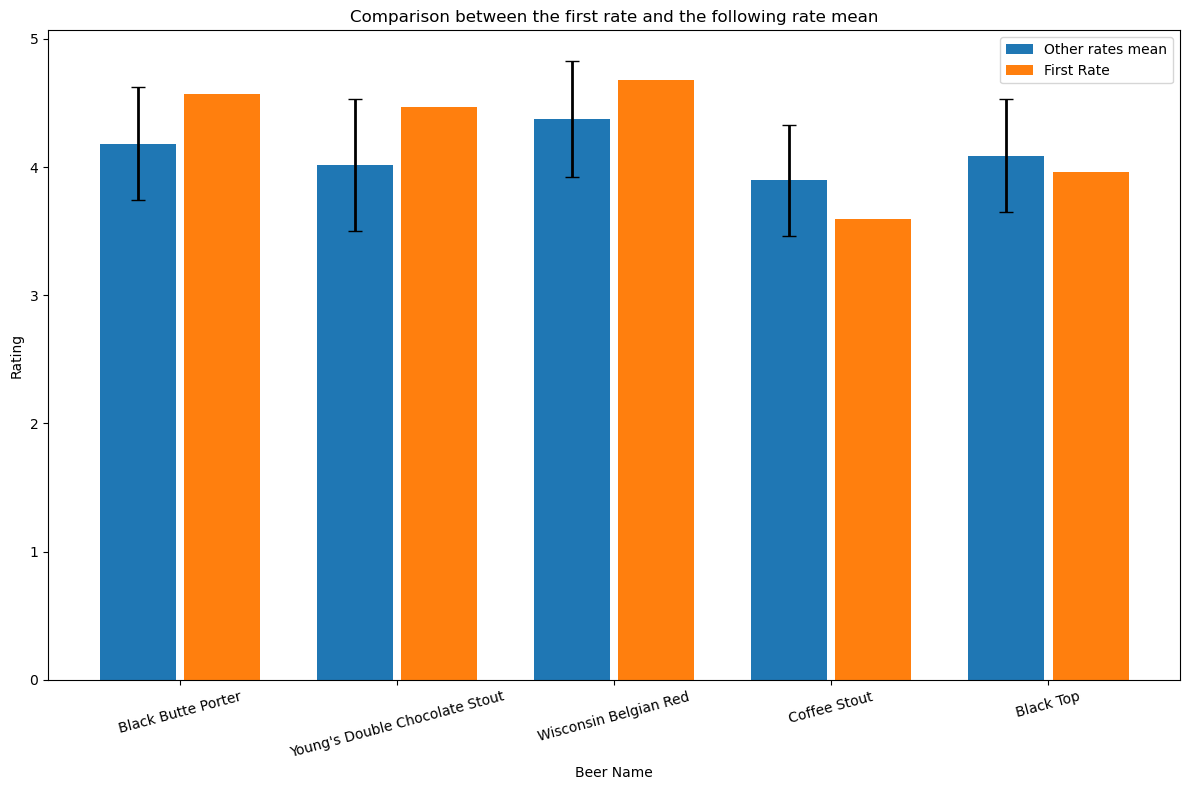

In [24]:
# sample un subset to plot
hist_df = first_df.sample(5)

hist_labels = hist_df['beer_name']
hist_overall_means = hist_df['other_rating']
hist_first_means = hist_df['first_rating']
hist_std = hist_df['other_std']

width = 0.35
gap = 0.02
x = np.arange(len(hist_labels))

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x - width/2-gap, hist_overall_means, width, label='Other rates mean', yerr=hist_std, capsize=5, error_kw={'elinewidth': 2, 'ecolor': 'black'})
ax.bar(x + width/2+gap, hist_first_means, width, label='First Rate')

ax.set_xlabel('Beer Name')
ax.set_ylabel('Rating')
ax.set_title('Comparison between the first rate and the following rate mean')
ax.set_xticks(x)
ax.set_xticklabels(hist_labels, rotation=15, ha='center')
ax.legend()

plt.tight_layout()
plt.show()

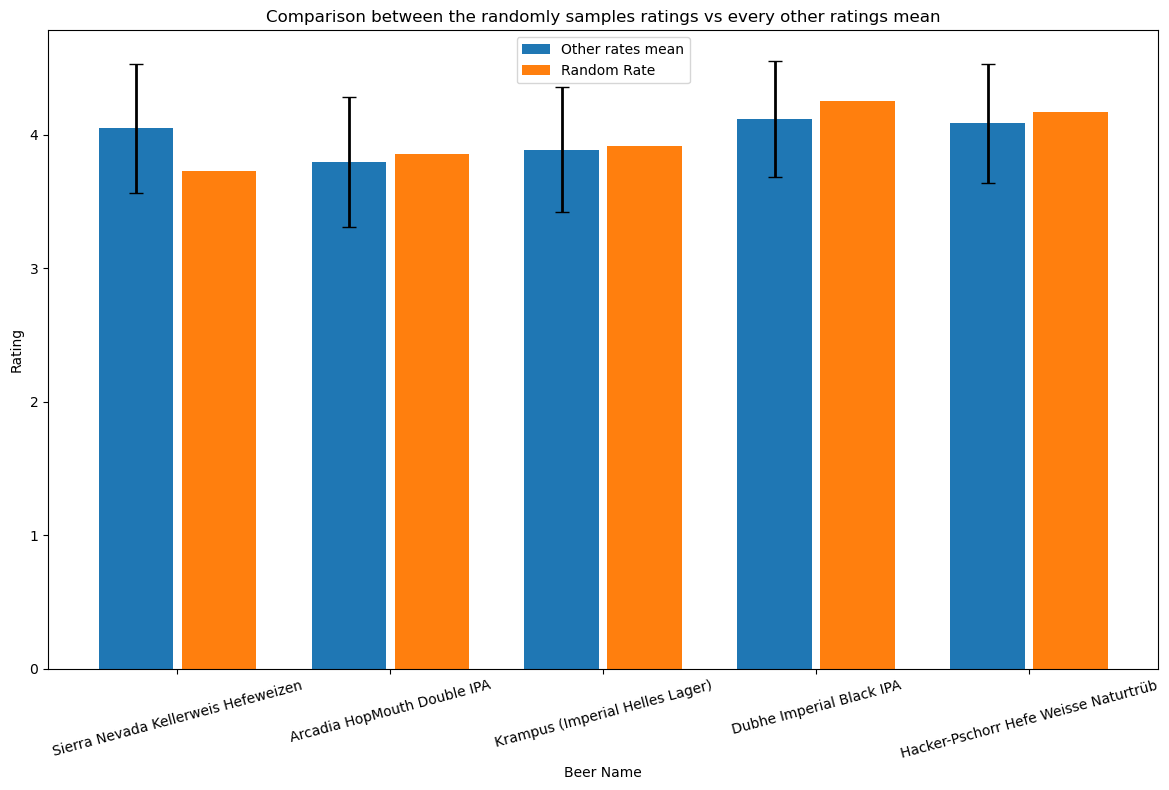

In [25]:
# sample un subset to plot
hist_df = random_df.sample(5)

hist_labels = hist_df['beer_name']
hist_overall_means = hist_df['other_rating']
hist_random_means = hist_df['random_rating']
hist_std = hist_df['other_std']
#hist_random_means = hist_df['random_std']

width = 0.35
gap = 0.02
x = np.arange(len(hist_labels))

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(x - width/2-gap, hist_overall_means, width, label='Other rates mean', yerr=hist_std, capsize=5, error_kw={'elinewidth': 2, 'ecolor': 'black'})
ax.bar(x + width/2+gap, hist_random_means, width, label='Random Rate')#, yerr=hist_random_means, capsize=5, error_kw={'elinewidth': 2, 'ecolor': 'black'})

ax.set_xlabel('Beer Name')
ax.set_ylabel('Rating')
ax.set_title('Comparison between the randomly samples ratings vs every other ratings mean')
ax.set_xticks(x)
ax.set_xticklabels(hist_labels, rotation=15, ha='center')
ax.legend()

plt.tight_layout()
plt.show()

In [26]:
first_df

,beer_name,other_rating,other_std,first_rating,first_std
beer_id,,,,,
5,Amber,3.453683,0.566147,3.468,0.407289
6,Turbodog,3.661494,0.497156,3.611,0.537617
7,Purple Haze,3.278002,0.651073,3.160,0.737322
10,Allagash Dubbel Ale,3.805580,0.434046,3.904,0.550822
17,Widmer Hefeweizen,3.315539,0.553557,3.966,0.394524
...,...,...,...,...,...
190513,Project PAM,4.200029,0.342962,4.153,0.329850
197183,Citradelic Tangerine IPA,3.839079,0.379491,4.092,0.583396
199848,Stone Pataskala Red X IPA,4.072419,0.319049,3.874,0.642637


In [27]:
random_df

,beer_name,other_rating,other_std,random_rating,random_std
beer_id,,,,,
5,Amber,3.453689,0.560755,3.467,1.136965
6,Turbodog,3.661425,0.497192,3.631,0.528445
7,Purple Haze,3.278511,0.651827,2.993,0.332467
10,Allagash Dubbel Ale,3.806900,0.434071,3.680,0.540535
17,Widmer Hefeweizen,3.319298,0.555575,3.174,0.276775
...,...,...,...,...,...
190513,Project PAM,4.201108,0.342444,4.042,0.352067
197183,Citradelic Tangerine IPA,3.839380,0.381573,4.042,0.270998
199848,Stone Pataskala Red X IPA,4.069847,0.323769,4.143,0.313300


### We can clearly see that the first ratings are not representative
-first they don't seems independants, we can clearly see that they tend to be close one to the other on the graphs, then we can also see that the often start a very different value from the final rating, the first user are hignly biased and influences each other. at the end the rate seem to be around the final rating, maybe we can see that every user is influenced by the actual rating of the beer.
- we can see that the MSE of the n first rating is larger that the MSE of n random rate of the beer. This means a new time that the first rating are highly biased.

Can we assume that the first ratings are biases or is that the following that are, and tend to be more neutral.

the rating always seem to converge around 3

ON POURRAIT SE DIRE QUE LES NOTE DU DEBUT SONT PLUS EXTREME ET QUELLE DEVIENNEN CENTREE PARCE QUE C'EST UNE MOYENNE MAIS C'EST FAUX ETANT DONNé QUE DE FAIRE LES GRAPH MONTRE BIEN QUE LES NOTES MENT NECESSAIREMENT DU TEMPS A CONVERGER VER ENVIRON 3 SI LES PREMIERE SONT EXTREMES => LES PREMIERES NOTESSONT BIAISéES

In [29]:
data_path = 'data/BeerAdvocate/ratings.csv'


# load the rating dataset
ratings_df = pd.read_csv(data_path)

In [88]:
def calculate_correlation(series1, series2):
    return np.corrcoef(series1, series2)[0, 1] # matrice de correlation donc on prend 01 ou 10

# Appliquer l'analyse par bière
grouped_data = ratings_df.groupby('beer_id')

rating_per_date = ratings_df[['beer_id', 'beer_name', 'date', 'rating']].sort_values(by=['beer_id', 'date'], ascending=True)
rating_per_date = rating_per_date.dropna()

rating_per_date['count'] = rating_per_date.groupby('beer_id')['beer_id'].transform('count')

min_count = 3000
rating_per_date = rating_per_date[rating_per_date['count'] > min_count]
#rating_per_date

In [92]:
rating_per_date['abs_diff'] = abs(rating_per_date['rating'] - 3)
rating_per_date

,beer_id,beer_name,date,rating,count,abs_diff
1338186,7,Purple Haze,1003485600,3.84,3293,0.84
1338185,7,Purple Haze,1016017200,3.57,3293,0.57
1338184,7,Purple Haze,1017741600,3.06,3293,0.06
1338183,7,Purple Haze,1018432800,3.92,3293,0.92
1338182,7,Purple Haze,1023530400,3.50,3293,0.50
...,...,...,...,...,...,...
1789112,148052,Hop Hunter,1500458400,4.00,3236,1.00
1789111,148052,Hop Hunter,1500544800,4.00,3236,1.00
1789110,148052,Hop Hunter,1500631200,3.91,3236,0.91
1789108,148052,Hop Hunter,1501063200,3.98,3236,0.98


In [93]:
rating_list = rating_per_date.groupby('beer_id').agg(beer_name=('beer_name', 'min'),  abs_diff_list=('abs_diff', list))
rating_list

,beer_name,abs_diff_list
beer_id,,
7,Purple Haze,"[0.8399999999999999, 0.5699999999999998, 0.060..."
30,Trois Pistoles,"[1.0599999999999996, 1.6600000000000001, 1.0, ..."
33,Maudite,"[1.8499999999999996, 2.0, 2.0, 2.0, 1.29999999..."
34,La Fin Du Monde,"[1.7000000000000002, 1.0, 1.6600000000000001, ..."
39,Alpha King,"[1.0, 1.2400000000000002, 2.0, 1.0, 1.0, 1.230..."
...,...,...
111616,Focal Banger India Pale Ale,"[1.5, 1.7300000000000004, 0.5, 0.75, 1.9000000..."
111969,Stone Go To IPA,"[1.3099999999999996, 1.0, 1.0, 1.2699999999999..."
117177,Sip Of Sunshine IPA,"[2.0, 1.5, 1.5, 1.75, 1.4299999999999997, 1.96..."


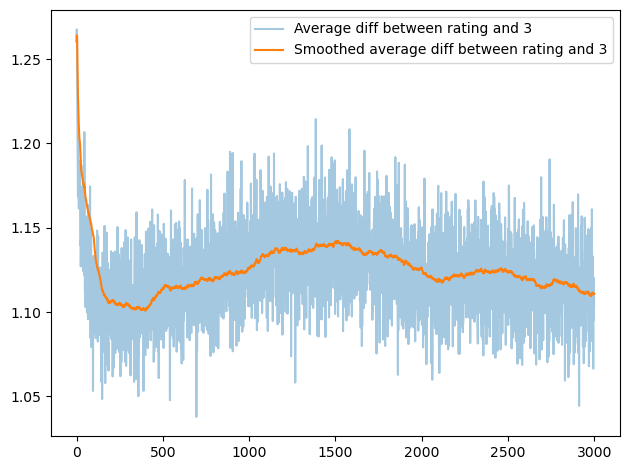

In [100]:
def moving_average(data, window_size=5):

    data_series = pd.Series(data)
    return data_series.rolling(window=window_size, min_periods=1).mean()

window_size = 100

mean_list = np.zeros(min_count)

for row in range(len(rating_list)):
    for i in range(min_count):
        mean_list[i] += rating_list.iloc[row,1][i]
    

mean_list = np.array(mean_list)/len(rating_list)

smoothed_mean_list = moving_average(mean_list, window_size=window_size)
plt.plot(mean_list, alpha=0.4, label='Average diff between rating and 3')
plt.plot(smoothed_mean_list, label='Smoothed average diff between rating and 3')
plt.legend()
plt.tight_layout()
plt.show()

We can clearly see that the firsts ratings tend to be more extreme that the following one. 
This might be due to the fact the the most enthusiastic or critical individuals are usually giving their rating firsts !
We can also considere the regression to the mean effect, rating tend to naturally move close to the average, 3 in this case, and this is due to the fact that the first rating are often highly bias by special circumstances, emotions or by the novelty of the beer. 

We saw that the first ratings seem to be bias but do this initial bias influenced the final rating of the beer ?

For that we want to measure the correlation between the first rating and the final rating of each beer

In [102]:
first_vs_other_rating = load_data_first_rating()

In [104]:
print(first_vs_other_rating.head())
print(first_vs_other_rating.describe())

   beer_id            beer_name  other_rating  other_std  first_rating
0        5                Amber      3.453443   0.565258          4.00
1        6             Turbodog      3.661182   0.497240          4.06
2        7          Purple Haze      3.277473   0.651283          3.84
3       10  Allagash Dubbel Ale      3.806008   0.434766          4.06
4       17    Widmer Hefeweizen      3.318346   0.554641          3.88
             beer_id  other_rating    other_std  first_rating
count    1404.000000   1404.000000  1404.000000   1404.000000
mean    41423.278490      3.929943     0.453664      4.058170
std     42647.519912      0.449811     0.094509      0.682769
min         5.000000      1.689515     0.240744      1.000000
25%      2093.750000      3.747559     0.394965      3.807500
50%     32411.500000      3.989802     0.438675      4.190000
75%     67822.000000      4.213665     0.491551      4.500000
max    211516.000000      4.800095     0.964300      5.000000


In [106]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(
    first_vs_other_rating['first_rating'], first_vs_other_rating['other_rating']
)
print(f"Pearson correlation: {corr:.2f}, p-value: {p_value:.3f}")

Pearson correlation: 0.68, p-value: 0.000


In [103]:
# check the correlation
corr_first = first_vs_other_rating['first_rating'].corr(first_vs_other_rating['other_rating'])
print("Correlation between the first and the others rating :", corr_first)

Correlation between the first and the others rating : 0.6830005985679996
